In [63]:
import numpy as np
import pandas as pd
import matplotlib as mplt
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
from matplotlib.patches import Polygon
%matplotlib inline

# Орехов Роман, 471a. Шаблон 2, н.у. "треугольник", $\sigma = 0.4$

![title](scheme_2.png)

# Теоретическое задание

Уравнение переноса: $u_t + \lambda u_x = 0, \lambda =1$

Множество схем: $ u_m ^{n+1} = \alpha_{-1} ^1 u_{m-1}^{n+1} + \alpha_{-1} ^{0} u_{m-1}^{n}+ \alpha_{0} ^{0} u_{m}^{n}+ \alpha_{1} ^{0} u_{m+1}^{n}$

Число Куранта: $ \sigma = {\lambda\tau\over h} = 0.4 $

## (1Т)

Условия аппроксимации первого порядка:
\begin{equation}
 \begin{cases}
   \alpha_{-1}^{1}+\alpha_{-1}^{0}+\alpha_{0}^{0}+\alpha_{1}^{0} = 1
   \\
   (-1-0.4)\alpha_{-1}^{1} - \alpha_{-1}^{0} + \alpha_{1}^{0} = -0.4
 \end{cases}
\end{equation}

Решение относительно $\alpha_{-1}^{1}$ и $\alpha_{-1}^{0}$:

In [64]:
from sympy.solvers import solve
from sympy import *

a, b, c, d = symbols('a b c d')
solve([a + b + c + d- 1, -1.4*a - b + d + 0.4], [a, b])

{b: -3.5*c - 6.0*d + 2.5, a: 2.5*c + 5.0*d - 1.5}

\begin{equation}
 \begin{cases}
   \alpha_{-1}^{1} = -3.5\alpha_{0}^{0} - 6\alpha_{1}^{0} + 2.5
   \\
   \alpha_{-1}^{0} = 2.5\alpha_{0}^{0} + 5\alpha_{1}^{0} - 1.5
 \end{cases}
\end{equation}

Aналитический вид для двухпара-метрического множества положительных по Фридрихсу ($\alpha_\mu^\nu\geq 0$) схем 1-го порядка аппроксимации:

\begin{equation}
 \begin{cases}
     u_m ^{n+1} = (-3.5\alpha_{0}^{0} - 6\alpha_{1}^{0} + 2.5) u_{m-1}^{n+1} + (2.5\alpha_{0}^{0} + 5\alpha_{1}^{0} - 1.5) u_{m-1}^{n}+ \alpha_{0}^{0} u_{m}^{n}+ \alpha_{1}^{0} u_{m+1}^{n}
     \\
    -3.5\alpha_{0}^{0} - 6\alpha_{1}^{0} + 2.5 \geq 0 
    \\
    2.5\alpha_{0}^{0} + 5\alpha_{1}^{0} - 1.5 \geq 0
    \\
    \alpha_{0}^{0} \geq 0
    \\
    \alpha_{1}^{0} \geq 0
 \end{cases}
\end{equation}

## (2Т)

Условия аппроксимации второго порядка:
\begin{equation}
 \begin{cases}
   \alpha_{-1}^{1}+\alpha_{-1}^{0}+\alpha_{0}^{0}+\alpha_{1}^{0} = 1
   \\
   -1.4\alpha_{-1}^{1} - \alpha_{-1}^{0} + \alpha_{1}^{0} = -0.4
   \\
   1.96\alpha_{-1}^{1} + \alpha_{-1}^{0} + \alpha_{1}^{0} = 0.16 
 \end{cases}
\end{equation}

Решение относительно $\alpha_{-1}^{1}$:

In [65]:
a, b, c, d = symbols('a b c d')
solve([a + b + c + d - 1, -1.4*a - b + d + 0.4, 1.96*a + b + d - 0.16], [a, b, c], rational=True )

{c: -24*d/7 + 3/7, b: 6*d + 1, a: -25*d/7 - 3/7}

\begin{equation}
 \begin{cases}
   \alpha_{-1}^{1} = -{25\over7}\alpha_{1}^{0} - {3\over7}
   \\
   \alpha_{-1}^{0} = 6\alpha_{1}^{0}  + 1
   \\
   \alpha_{0}^{0} = -{24\over7}\alpha_{1}^{0} + {3\over7}
 \end{cases}
\end{equation}

Aналитический вид для одно-параметрического множества схем 2-го порядка аппроксимации:

$u_m ^{n+1} = (-{25\over7}\alpha_{1}^{0} - {3\over7})u_{m-1}^{n+1} + (6\alpha_{1}^{0}  + 1)u_{m-1}^{n} (-{24\over7}\alpha_{1}^{0} + {3\over7})u_{m}^{n}+ \alpha_{1} ^{0} u_{m+1}^{n}$
   

## (3Т)

Условия аппроксимации третьего порядка:
\begin{equation}
 \begin{cases}
   \alpha_{-1}^{1}+\alpha_{-1}^{0}+\alpha_{0}^{0}+\alpha_{1}^{0} = 1
   \\
   -1.4\alpha_{-1}^{1} - \alpha_{-1}^{0} + \alpha_{1}^{0} = -0.4
   \\
   1.96\alpha_{-1}^{1} + \alpha_{-1}^{0} + \alpha_{1}^{0} = 0.16 
   \\
   -(1.4)^3\alpha_{-1}^{1} - \alpha_{-1}^{0} + \alpha_{1}^{0} = -(0.4)^3
 \end{cases}
\end{equation}

Решение: 

In [66]:
a, b, c, d = symbols('a b c d')
solve([a + b + c + d - 1, -1.4*a - b + d + 0.4, 1.96*a + b + d - 0.16, -1.4**3*a - b + d + 0.4**3], [a, b, c, d], rational=True )

{c: 3/5, b: 7/10, a: -1/4, d: -1/20}

\begin{equation}
 \begin{cases}
   \alpha_{-1}^{1} = -{1\over 4}
   \\
   \alpha_{-1}^{0} = {7\over 10}
   \\
   \alpha_{0}^{0} = {3\over 5}
   \\
   \alpha_{1}^{0} = -{1\over 20}
 \end{cases}
\end{equation}

Аналитический вид для единственной схемы 3-го порядка аппроксимации, соответсвующей точке __F(3/5;-1/20)__:

$ u_m ^{n+1} = -{1\over 4}u_{m-1}^{n+1} + {7\over 10}u_{m-1}^{n} + {3\over 5}u_{0}^{0} + -{1\over 20}u_{m+1}^{n}$

## (4Т)

Множество двух-параметрических положительных схем:

\begin{equation}
 \begin{cases}
     u_m ^{n+1} = (-3.5\alpha_{0}^{0} - 6\alpha_{1}^{0} + 2.5) u_{m-1}^{n+1} + (2.5\alpha_{0}^{0} + 5\alpha_{1}^{0} - 1.5) u_{m-1}^{n}+ \alpha_{0}^{0} u_{0}^{0}+ \alpha_{1}^{0} u_{m+1}^{n}
     \\
    -3.5\alpha_{0}^{0} - 6\alpha_{1}^{0} + 2.5 \geq 0 
    \\
    2.5\alpha_{0}^{0} + 5\alpha_{1}^{0} - 1.5 \geq 0
    \\
    \alpha_{0}^{0} \geq 0
    \\
    \alpha_{1}^{0} \geq 0
 \end{cases}
\end{equation}

Найдем вершины множества:

In [67]:
x, y = symbols('x y')
solve([-3.5*x-6*y+2.5, x], [x, y], rational=True )

{x: 0, y: 5/12}

In [68]:
x, y = symbols('x y')
solve([2.5*x+5*y-1.5, x], [x, y], rational=True )

{x: 0, y: 3/10}

In [69]:
x, y = symbols('x y')
solve([-3.5*x-6*y+2.5, y], [x, y], rational=True )

{x: 5/7, y: 0}

In [70]:
x, y = symbols('x y')
solve([2.5*x+5*y-1.5, y], [x, y], rational=True )

{x: 3/5, y: 0}

$u_m ^{n+1} = (-3.5\alpha_{0}^{0} - 6\alpha_{1}^{0} + 2.5) u_{m-1}^{n+1} + (2.5\alpha_{0}^{0} + 5\alpha_{1}^{0} - 1.5) u_{m-1}^{n}+ \alpha_{0}^{0} u_{0}^{0}+ \alpha_{1}^{0} u_{m+1}^{n}$

Вершины множества: __A(0; 3/10), B(0; 5/12), C(5/7; 0), D(3/5; 0)__

Из графика в пункте __(6T)__ видно, что наиболее точная схема соответствует точке __D(3/5; 0)__:

$u_m ^{n+1} = (-3.5*3/5 + 2.5) u_{m-1}^{n+1} + (2.5*3/5 - 1.5) u_{m-1}^{n}+ 3/5u_{m}^{n} = 0.4 u_{m-1}^{n+1}+ 0.6 u_{m}^{n} $

Схемы, соответсвующие остальным вершинам __A(0; 3/10), B(0; 5/12), C(5/7; 0)__ соответсвенно:
$u_m ^{n+1} = (-6*0.3 + 2.5) u_{m-1}^{n+1} + (5*0.3 - 1.5) u_{m-1}^{n}+ 0.3 u_{m+1}^{n} = 0.7 u_{m-1}^{n+1} + 0.3 u_{m+1}^{n}$

$u_m ^{n+1} = (-6*5/12 + 2.5) u_{m-1}^{n+1} + (5*5/12 - 1.5) u_{m-1}^{n}+ 5/12 u_{m+1}^{n} =7/12 u_{m-1}^{n} +  5/12 u_{m+1}^{n} $

$u_m ^{n+1} = (-3.5*5/7 + 2.5) u_{m-1}^{n+1} + (2.5*5/7 - 1.5) u_{m-1}^{n}+ 5/7u_{m}^{n} = 2/7 u_{m-1}^{n}+ 5/7u_{m}^{n} $


In [71]:
# x, y, z, w = symbols('x y z w')
# solve([-3.5*x-6*y+2.5-z,2.5*x+5*y-1.5-w, x, w], [x,y,z,w])

## (5Т)

Наиболее близкой ко множеству положительных по Фридрихсу схем будет схема, соответствующая основанию перпендикуляра E из точки D(3/5; 0) к прямой, задающей однопараметрическое множество схем 2-го порядка аппроксимации.

Найдем точку E:

In [72]:
h = lambda x: -7.0/24*x + 1.0/8
a = np.array([0.1-0, h(0.1)-h(0)]) #направляющая прямой
D = np.array([3.0/5, 0])
x, y = symbols('x y')
solve([-7.0/24*x + 1.0/8 - y, np.dot(a, [x, y] - D)], [x, y], rational=True )

{x: 1833/3125, y: -144/3125}

__Е(1833/3125; -144/3125)__

Соответсвующая схема: $u_m ^{n+1} = (-{25\over7}(-144/3125) - {3\over7})u_{m-1}^{n+1} + (6*(-144/3125)  + 1)u_{m-1}^{n} + (-{24\over7}(-144/3125) + {3\over7})u_{m}^{n}+ (-144/3125) u_{m+1}^{n} = -\frac{33}{125} u_{m-1}^{n+1} + \frac{2261}{3125} u_{m-1}^{n} + \frac{1833}{3125} u_{m}^{n} -  \frac{144}{3125} u_{m+1}^{n} $

##  (6T)

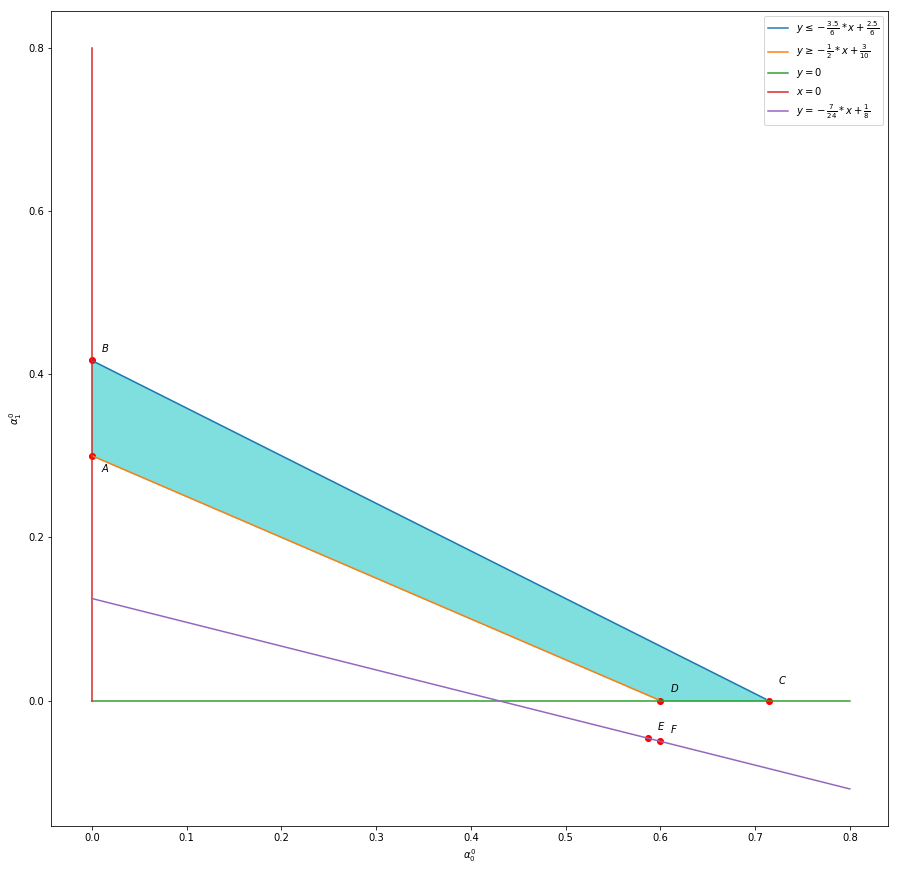

In [73]:
#\alpha_{0}^{0} = x \alpha_{1}^{0} = y

f = lambda x: -3.5/6*x + 2.5/6 # y <= f(x)
g = lambda x: -0.5*x + 0.3 # y >= g(x)
h = lambda x: -7.0/24*x + 1.0/8 # y = h(x)
ix =(0, 0, 5.0/7, 3.0/5, 1833.0/3125, 3.0/5)
iy = (0.3, 5.0/12, 0, 0, -144.0/3125, -1.0/20)

fig, ax = plt.subplots(figsize=(15,15))
x = np.linspace(0, 0.8, 100)
a = np.array([i for i in x if f(i)>0])
plt.plot(a, f(a), label = "$y \leq -\\frac{3.5}{6}*x + \\frac{2.5}{6}$")
a = np.array([i for i in x if g(i)>0])
plt.plot(a, g(a), label = "$y \geq -\\frac{1}{2}*x + \\frac{3}{10}$")
plt.plot(x, 0*x, label = "$y = 0$")
plt.plot(0*x, x, label = "$x = 0$")
plt.plot(x, h(x), label = "$y = -\\frac{7}{24}*x + \\frac{1}{8}$")
yd = np.maximum(x*0, g(x))
plt.fill_between(x, f(x), yd, color='c', alpha=0.5, where=f(x)>=0)

plt.scatter(ix, iy, marker='o', color='red')

ax.annotate('$A$', xy = (ix[0], iy[0]), xytext=(ix[0]+0.01, iy[0]-0.02))
ax.annotate('$B$', xy = (ix[1], iy[1]), xytext=(ix[1]+0.01, iy[1]+0.01))
ax.annotate('$C$', xy = (ix[2], iy[2]), xytext=(ix[2]+0.01, iy[2]+0.02))
ax.annotate('$D$', xy = (ix[3], iy[3]), xytext=(ix[3]+0.01, iy[3]+0.01))
ax.annotate('$E$', xy = (ix[4], iy[4]), xytext=(ix[4]+0.01, iy[4]+0.01))
ax.annotate('$F$', xy = (ix[5], iy[5]), xytext=(ix[5]+0.01, iy[5]+0.01))

plt.ylabel("$ \\alpha_{1}^{0}$")
plt.xlabel('$ \\alpha_{0}^{0}$')
plt.legend()

__A, B, C, D__ - вершины двухпараметрического множества положительных по Фридрихсу схем 1-го порядка аппроксимации.

__E__ - наиболее близкая ко множеству положительных по Фридрихсу схем.

__F__ - единственная схема 3-го порядка аппроксимации.

# Практическое задание:

Решить краевую задачу:
\begin{equation}
 \begin{cases}
   u_t + \lambda u_x = 0 \; \lambda = 1 \;(t > 0, 0 < x \leq 2 ),
   \\
   u(0,x) = \phi(x) \; (0 < x \leq 2),
   \\
   u(t,0) = 0 \; (0 < t \leq 100 \tau).
 \end{cases} 
\end{equation}

Где функция $\phi(x)$ определяется как
\begin{equation*}
\phi(x) = 
    \begin{cases}
       10x-4 \; \text{при $0.4\leq x\leq 0.5$},
       \\
       -10x+6 \; \text{при $0.5\leq x\leq 0.6$}
       \\
       0 \; \text{иначе}
     \end{cases} 
\end{equation*}


Шаблон:
![title](scheme_2.png)

Сетка: h = 0.01 (201 узел)

Число Куранта: $ \sigma = {\lambda\tau\over h} = 0.4 \Rightarrow$ Шаг по времени $\tau = {\sigma h \over \lambda} = 0.004 $

In [74]:
# grid
sigma = 0.4
lamda = 1
step_x = 0.01
min_x = 0
max_x = 3
n_x = int(max_x/step_x) + 1
step_t = sigma*step_x/lamda
min_t = 0
max_t = 100*step_t
n_t = int(max_t/step_t) + 1

In [75]:
# phi function
def phi(x):
    val = 0.0
    if (0.5 >= x >= 0.4):
        val = 10*x - 4
    if (0.6 >= x > 0.5):
        val = -10*x + 6
    return val 

# phi values
val_phi = np.zeros(n_x)
for i in range(0, n_x):
    val_phi[i] = phi(i*step_x)

In [76]:
# initial conditions
u_x_0 = val_phi
u_t_0 = 0

In [77]:
# calculation
def calc(t, coef):
    u_prev = u_x_0.copy()
    u = np.zeros(n_x)
    u[0] = u_t_0
    for n in range(0, t):
        for m in range(1, n_x-1):
            u[m] = np.dot(coef, [u[m-1], u_prev[m-1], u_prev[m], u_prev[m+1]])
        u[n_x-1] = np.dot(coef, [u[m-1], u_prev[m-1], u_prev[m], 0])
        u_prev = u.copy()
    return u

In [78]:
# plot drawer
def plt_draw(coef):
    t = 100
    plt.figure(figsize=(10,7))
    x = np.linspace(0, max_x, n_x)
    y_exact = [phi(i-step_t*t) for i in x]
    y = calc(t,coef)
    plt.plot(x, y_exact, label = "Exact solution")
    plt.plot(x, y) #, label = "$ u_m ^{n+1} = %.2f*u_{m-1}^{n+1} + %.2f*u_{m-1}^{n}+ %.2f*u_{m}^{n} + %.2f*u_{m+1}^{n}$" % (coef[0], coef[1], coef[2], coef[3]))
    plt.ylabel("t")
    plt.xlabel('x')
    plt.legend()
    plt.show()

## (1П)

Обозначим коэффициенты __$\alpha_{-1}^{1}, \alpha_{-1}^{0}, \alpha_{0}^{0}, \alpha_{1}^{0}$ __, как __a, b, c, d__.

Схемы, соответсвующие  вершинам __A(0; 3/10), B(0; 5/12), C(5/7; 0), D(3/5; 0)__ соответсвенно:


$u_m ^{n+1} = 0.7 u_{m-1}^{n+1} + 0.3 u_{m+1}^{n}$ $\;$
a=0.7 d=0.3

$u_m ^{n+1} =  7/12 u_{m-1}^{n} +  5/12 u_{m+1}^{n} $ $\;$
b=7/12  d=5/12

$u_m ^{n+1} = 2/7 u_{m-1}^{n}+ 5/7u_{m}^{n} $ $\;$
b=2/7  с=5/7

$u_m ^{n+1} = 0.4 u_{m-1}^{n+1}+ 0.6 u_{m}^{n} $ $\;$
a=0,4 с=0,6

Наиболее точная схема соответсвует вершине __D(3/5; 0)__

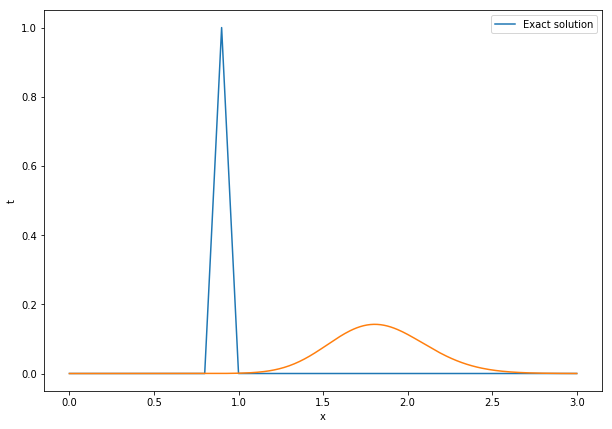

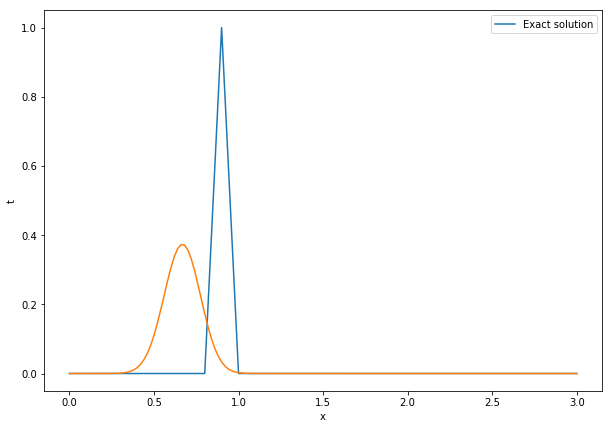

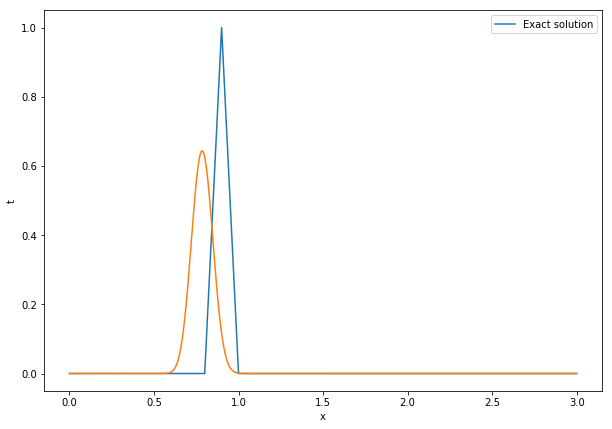

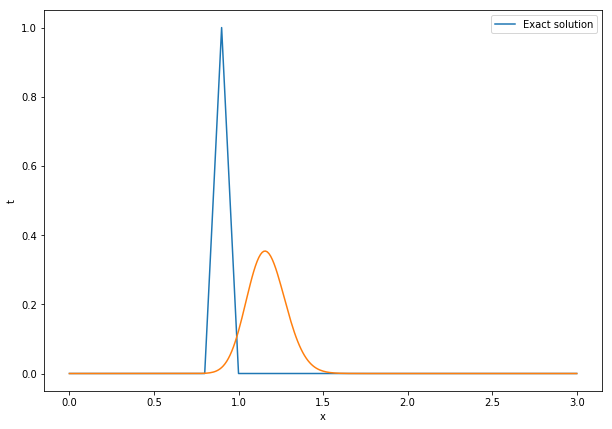

In [79]:
# Plots
#A
coef = [0.7, 0, 0, 0.3] 
plt_draw(coef)
#B
coef = [0, 7.0/12, 0, 5.0/12] 
plt_draw(coef)
#C
coef = [0, 2.0/7, 5.0/7, 0] 
plt_draw(coef)
#D
coef = [0.4, 0, 0.6, 0] 
plt_draw(coef)

## (2П) 

Наименее осциллирующая на разрывных решениях схема 2-го порядка аппроксимации из (5т), соответствующая точке __Е(1833/3125; -144/3125)__:

$u_m ^{n+1} = -\frac{33}{125} u_{m-1}^{n+1} + \frac{2261}{3125} u_{m-1}^{n} + \frac{1833}{3125} u_{m}^{n} - \frac{144}{3125} u_{m+1}^{n} $  $\;$
$ a=-\frac{33}{125} b=\frac{2261}{3125} с=\frac{1833}{3125} d=-\frac{144}{3125} $

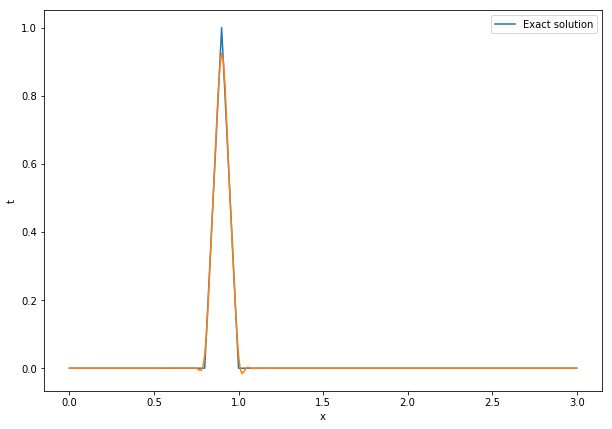

In [80]:
#E
coef = [-33.0/125, 2261.0/3125, 1833.0/3125, -144.0/3125]
plt_draw(coef)

## (3П)

Выберем две схемы 2-го порядка аппроксимации, лежащие на прямой – однопараметрическом множестве схем 2-го порядка аппроксимации – по разные стороны от схемы из (5т): __ (3/7; 0), (27/35; -0.1) __

Схема из __(5Т)__:
\begin{equation}
 \begin{cases}
   \alpha_{-1}^{1} = -{25\over7}\alpha_{1}^{0} - {3\over7}
   \\
   \alpha_{-1}^{0} = 6\alpha_{1}^{0}  + 1
   \\
   \alpha_{0}^{0} = -{24\over7}\alpha_{1}^{0} + {3\over7}
 \end{cases}
\end{equation}

In [81]:
# Расчет точек
a, b, c, d = symbols('a b c d')
print solve([-25.0/7*d -3.0/7 - a, 6*d + 1 - b, -24.0/7*d + 3.0/7 - c, d], [a, b, c, d], rational=True )
print solve([-25.0/7*d -3.0/7 - a, 6*d + 1 - b, -24.0/7*d + 3.0/7 - c, d + 0.1], [a, b, c, d], rational=True )

{c: 3/7, b: 1, a: -3/7, d: 0}
{c: 27/35, b: 2/5, a: -1/14, d: -1/10}


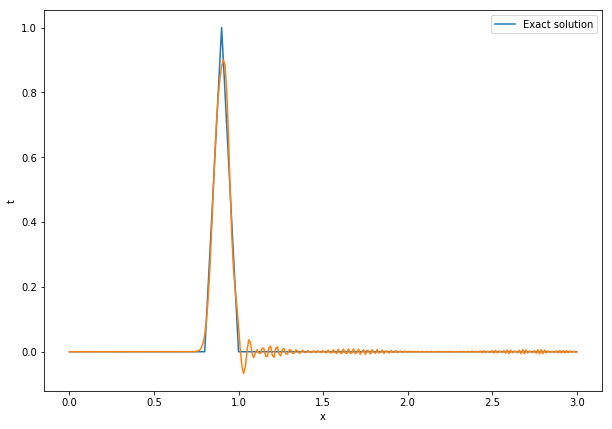

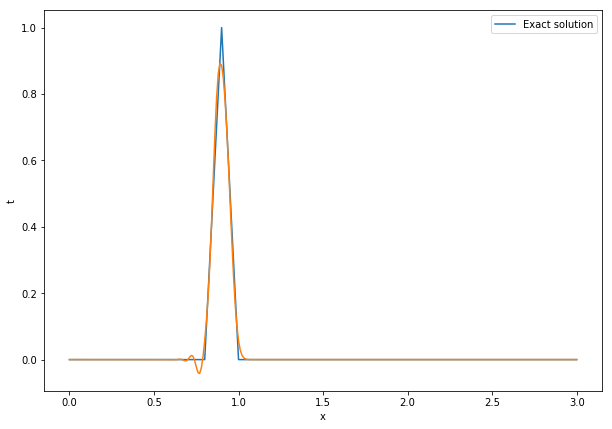

In [82]:
#(3/7; 0)
coef = [-3.0/7, 1.0, 3.0/7, 0]
plt_draw(coef)
#(27/35; -0.1)
coef = [-1.0/14, 2.0/5, 27.0/35, -0.1]
plt_draw(coef)

## (4П)

Схема 3-го порядка аппроксимации из (3т):
$ u_m ^{n+1} = -{1\over 4}u_{m-1}^{n+1} + {7\over 10}u_{m-1}^{n} + {3\over 5}u_{0}^{0} -{1\over 20}u_{m+1}^{n}$

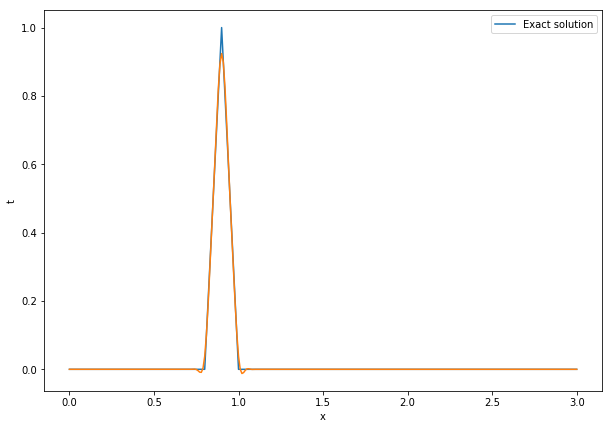

In [83]:
#F
coef = [-1.0/4, 0.7, 0.6, -1.0/20]
plt_draw(coef)

# Гибридные схемы

Наклон характеристики $dx/dt= \lambda = 1$.

Число Куранта: $ \sigma = {\lambda\tau\over h}= {\tau\over h} = 0.4 $

Шаблон:
![title](scheme_2.png)

На данном шаблоне это будет прямая с наклоном 2.5, поэтому при проэкции вдоль этой прямой на n-ый слой, точка __(m; n+1)__ будет между __(m; n)__ и __(m-1; n)__.

In [84]:
# Проверка критерия
def criterion(u, u_prev, m):
    if (min(u_prev[m-1], u_prev[m]) <= u[m] <= max(u_prev[m-1], u_prev[m])):
        return True
    return False

# Для двух схем      
def calc_hybrid2(t, coef_a): #coef_a - массив коэффициентов раных схем
    u_prev = u_x_0.copy()
    u = np.zeros(n_x)
    u[0] = u_t_0
    for n in range(0, t):
        for m in range(1, n_x-1):
            u[m] = np.dot(coef_a[0], [u[m-1], u_prev[m-1], u_prev[m], u_prev[m+1]])
            if not criterion(u, u_prev, m):
                u[m] = np.dot(coef_a[1], [u[m-1], u_prev[m-1], u_prev[m], u_prev[m+1]])
        u[n_x-1] = np.dot(coef[0], [u[m-1], u_prev[m-1], u_prev[m], 0]) # крайняя точка
        if not criterion(u, u_prev, m):
            u[n_x-1] = np.dot(coef[1], [u[m-1], u_prev[m-1], u_prev[m], 0])
        u_prev = u.copy()
    return u

# Для трех схем      
def calc_hybrid3(t, coef_a): #coef_a - массив коэффициентов раных схем
    u_prev = u_x_0.copy()
    u = np.zeros(n_x)
    u[0] = u_t_0
    for n in range(0, t):
        for m in range(1, n_x-1):
            u[m] = np.dot(coef_a[0], [u[m-1], u_prev[m-1], u_prev[m], u_prev[m+1]])
            if not criterion(u, u_prev, m):
                u[m] = np.dot(coef_a[1], [u[m-1], u_prev[m-1], u_prev[m], u_prev[m+1]])
                if not criterion(u, u_prev, m):
                    u[m] = np.dot(coef_a[2], [u[m-1], u_prev[m-1], u_prev[m], u_prev[m+1]])
        u[n_x-1] = np.dot(coef[0], [u[m-1], u_prev[m-1], u_prev[m], 0]) # крайняя точка
        if not criterion(u, u_prev, m):
            u[n_x-1] = np.dot(coef[1], [u[m-1], u_prev[m-1], u_prev[m], 0])
            if not criterion(u, u_prev, m):
                u[n_x-1] = np.dot(coef[2], [u[m-1], u_prev[m-1], u_prev[m], 0])
        u_prev = u.copy()
    return u


In [85]:
# График для 2х схем
def plt_draw_hybrid2(coef):
    t = 100
    plt.figure(figsize=(10,7))
    x = np.linspace(0, max_x, n_x)
    y_exact = [phi(i-step_t*t) for i in x]
    y = calc_hybrid2(t,coef)
    plt.plot(x, y_exact, label = "Exact solution")
    plt.plot(x, y) #, label = "$ u_m ^{n+1} = %.2f*u_{m-1}^{n+1} + %.2f*u_{m-1}^{n}+ %.2f*u_{m}^{n} + %.2f*u_{m+1}^{n}$" % (coef[0], coef[1], coef[2], coef[3]))
    plt.ylabel("t")
    plt.xlabel('x')
    plt.legend()
    plt.show()

# График для 3х схем
def plt_draw_hybrid3(coef):
    t = 100
    plt.figure(figsize=(10,7))
    x = np.linspace(0, max_x, n_x)
    y_exact = [phi(i-step_t*t) for i in x]
    y = calc_hybrid3(t,coef)
    plt.plot(x, y_exact, label = "Exact solution")
    plt.plot(x, y) #, label = "$ u_m ^{n+1} = %.2f*u_{m-1}^{n+1} + %.2f*u_{m-1}^{n}+ %.2f*u_{m}^{n} + %.2f*u_{m+1}^{n}$" % (coef[0], coef[1], coef[2], coef[3]))
    plt.ylabel("t")
    plt.xlabel('x')
    plt.legend()
    plt.show()   

## (5П) 

Гибридная схема, полученная с использованием схем из пункта __(3п)__: __(3/7; 0), (27/35; -0.1)__ и сеточно-характеристического критерия монотонности

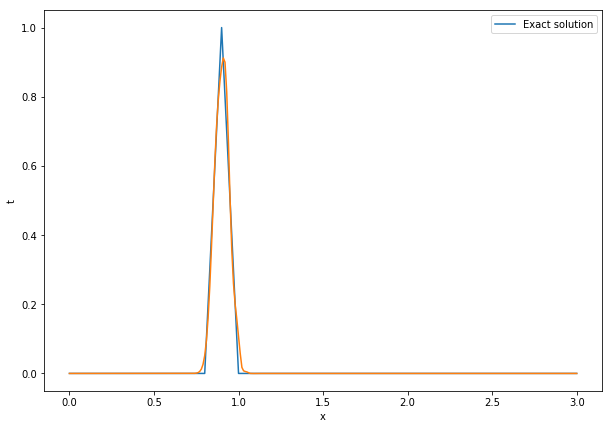

In [86]:
coef = [[-3.0/7, 1.0, 3.0/7, 0], [-1.0/14, 2.0/5, 27.0/35, -0.1]]
plt_draw_hybrid2(coef)

## (6П) 

Гибридная схема, полученным с использованием одной из схем из пункта __(3п)__, схемы из пункта __(4п)__ и сеточно-характеристического критерия монотонности:

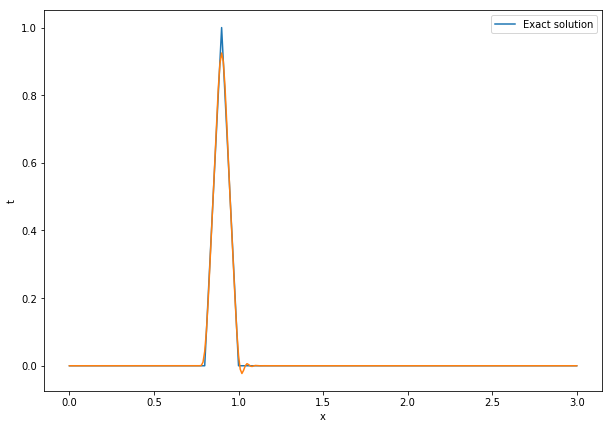

In [87]:
coef = [[-1.0/4, 0.7, 0.6, -1.0/20], [-3.0/7, 1.0, 3.0/7, 0]]
plt_draw_hybrid2(coef)

## (7П) 

Гибридная схема, полученная с одновременным использованием двух схем из пункта __(3п)__, схемы из пункта __(4п)__ и сеточно-характеристического критерия монотонности:

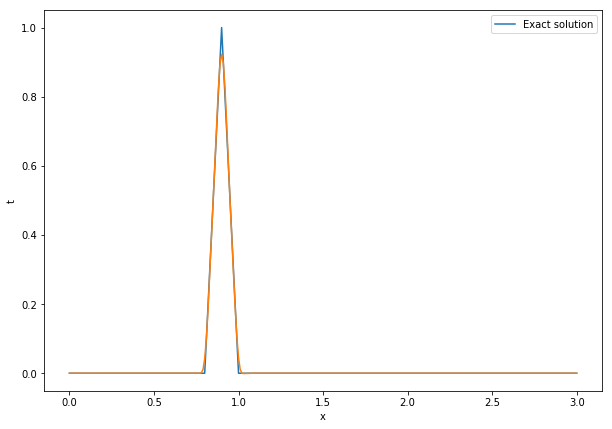

In [88]:
coef = [[-1.0/4, 0.7, 0.6, -1.0/20], [-3.0/7, 1.0, 3.0/7, 0], [-1.0/14, 2.0/5, 27.0/35, -0.1]]
plt_draw_hybrid3(coef)